## Notes?
1. Why is RMSE so high? y is a single float.
2. Conv1D kernal only works with 1
3. Dense error

In [1]:
import pandas as pd
import numpy as np
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
#from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
rcParams['axes.titlesize'] = 'xx-large'
rcParams['axes.titleweight'] = 'bold'
rcParams["legend.loc"] = 'upper left'
look = 15
lead = 1 # 3, 5, 7, 10

In [2]:
#1934-4-01  2018-07-09
Qx = pd.read_csv('../../data/streamflw_precipitation/X_Ganges.csv', index_col=1,header=0,parse_dates=True) #Brahmaputra #Meghna
print (Qx.head())
print("End Qx.head()")
#print (Qx.index[-220:])
idx = []
for i in np.arange(1-look,1,1):
    idx.append('Q_'+str(i))
Qx = Qx.loc[:,idx]
#print (Qx.head())
Qy = pd.read_csv('../../data/streamflw_precipitation/Y_Ganges.csv', index_col=1,header=0,parse_dates=True)
#print (Qy.head())
idy = []
for i in np.arange(lead,lead+10,1):
    idy.append('Q_'+str(i))
Qy = Qy.loc[:,idy]
#print (Qy.head())

Qy.head()

            Unnamed: 0  Q_-20  Q_-19  Q_-18  Q_-17  Q_-16  Q_-15  Q_-14  \
Date                                                                      
1985-05-01         120  739.0  728.0  717.0  754.0  821.0  819.0  824.0   
1985-05-02         121  728.0  717.0  754.0  821.0  819.0  824.0  814.0   
1985-05-03         122  717.0  754.0  821.0  819.0  824.0  814.0  815.0   
1985-05-04         123  754.0  821.0  819.0  824.0  814.0  815.0  803.0   
1985-05-05         124  821.0  819.0  824.0  814.0  815.0  803.0  793.0   

            Q_-13  Q_-12  ...     Q_-9   Q_-8   Q_-7   Q_-6   Q_-5   Q_-4  \
Date                      ...                                               
1985-05-01  814.0  815.0  ...    800.0  805.0  813.0  824.0  829.0  829.0   
1985-05-02  815.0  803.0  ...    805.0  813.0  824.0  829.0  829.0  852.0   
1985-05-03  803.0  793.0  ...    813.0  824.0  829.0  829.0  852.0  810.0   
1985-05-04  793.0  800.0  ...    824.0  829.0  829.0  852.0  810.0  756.0   
1985-05-05  

,Q_1,Q_2,Q_3,Q_4,Q_5,Q_6,Q_7,Q_8,Q_9,Q_10
Date,,,,,,,,,,
1985-05-01,830.0,903.0,934.0,952.0,958.0,968.0,918.0,783.0,838.0,922.0
1985-05-02,903.0,934.0,952.0,958.0,968.0,918.0,783.0,838.0,922.0,893.0
1985-05-03,934.0,952.0,958.0,968.0,918.0,783.0,838.0,922.0,893.0,874.0
1985-05-04,952.0,958.0,968.0,918.0,783.0,838.0,922.0,893.0,874.0,879.0
1985-05-05,958.0,968.0,918.0,783.0,838.0,922.0,893.0,874.0,879.0,861.0


In [3]:
X = np.swapaxes(Qx.values[np.newaxis], 0, 1)
y = np.swapaxes(Qy.iloc[:,0].values[np.newaxis], 0, 1)
# lead time 5 7 10

In [4]:
print(X.shape)
print(y.shape)

(4896, 1, 15)
(4896, 1)


In [5]:
print(len(Qx.columns))

15


In [6]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Conv1D,Flatten

from tensorflow.keras import initializers, regularizers

from keras_pandas.Automater import Automater

Using TensorFlow backend.


## Params
Default params for networks

In [7]:
# Rolling window of X
rolling_window = len(Qx.columns)

# of epochs
numEpoch = 5

# Which day are we predicting?
#y = Qy['Q_1']


In [8]:
l2 = regularizers.l2
bias = initializers.glorot_uniform(seed = 0)
#kernal = 

## Dense

In [9]:
def initDense():
    # Initialize network as sequential
    model = Sequential()
    
    # Add reccurant layer
    model.add(Dense(10,
                        input_shape = (1, rolling_window),))
    
    # Add dense layer
    model.add(Dense(1,))
    
    #return model
    return model
    
initDense().summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1, 10)             160       
_________________________________________________________________
dense_1 (Dense)              (None, 1, 1)              11        
Total params: 171
Trainable params: 171
Non-trainable params: 0
_________________________________________________________________


## RNN

In [10]:
def initRNN():
    # Initialize network as sequential
    model = Sequential()
        
    # Add reccurant layer
    model.add(SimpleRNN(10,
                        input_shape = (1, rolling_window),))
    
    # Syncronize with input shape    
    #model.add(Flatten())

    
    # Add dense layer
    model.add(Dense(1))
    
    #return model
    return model
    
initRNN().summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 10)                260       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 271
Trainable params: 271
Non-trainable params: 0
_________________________________________________________________


## LSTM

In [11]:
def initLSTM():
    # Initialize network as sequential
    model = Sequential()
    
    # Add reccurant LSTM layer
    model.add(LSTM(10,
                        input_shape = (1, rolling_window),))
    
    # Add dense layer
    model.add(Dense(1,))
    
    #return model
    return model
    
initLSTM().summary() 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10)                1040      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 1,051
Trainable params: 1,051
Non-trainable params: 0
_________________________________________________________________


# CNN
Issues:
Input shape dimensionality

In [12]:
def initCNN():
    # Initialize network as sequential
    model = Sequential()
    
    # Add reccurant LSTM layer
    model.add(Conv1D(filters = 10, kernel_size = 2, input_shape = (3, rolling_window),))
    model.add(Flatten())
    
    # Add dense layer
    model.add(Dense(1,))
    
    #return model
    return model
    
initCNN().summary() 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 2, 10)             310       
_________________________________________________________________
flatten (Flatten)            (None, 20)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 21        
Total params: 331
Trainable params: 331
Non-trainable params: 0
_________________________________________________________________


## Arima

Find way to make stationary, use dickey fuller test. May have to modify data to make 1d

In [13]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
import itertools

In [14]:
X.shape

(4896, 1, 15)

In [15]:
lag_acf  = acf( X[:,0,0], nlags=30)
lag_pacf = pacf(X[:,0,0], nlags=30, method='ols')

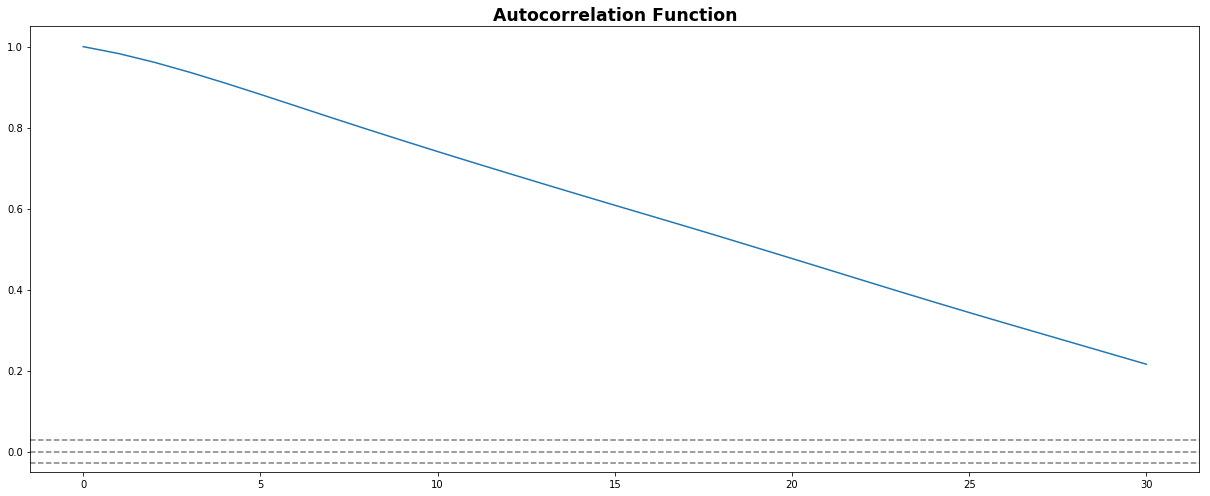

In [16]:
#Plot ACF:
plt.figure(figsize=(33.3,7))
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(X[:,0,0])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(X[:,0,0])),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.tight_layout()

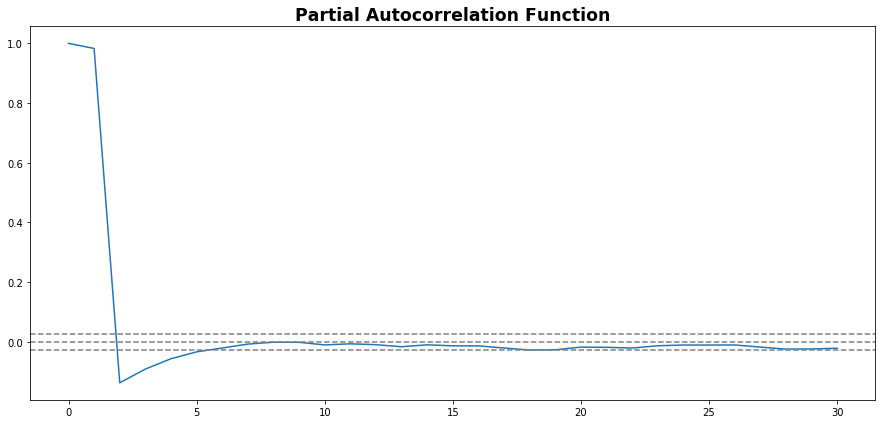

In [17]:
#Plot PACF:
plt.figure(figsize=(24.3,6))
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(X[:,0,0])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(X[:,0,0])),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [18]:
xDiff = np.diff(X[:,0,0], n=1)
lag_acf_Diff  = acf( xDiff, nlags=30)
lag_pacf_Diff = pacf(xDiff, nlags=30, method='ols')

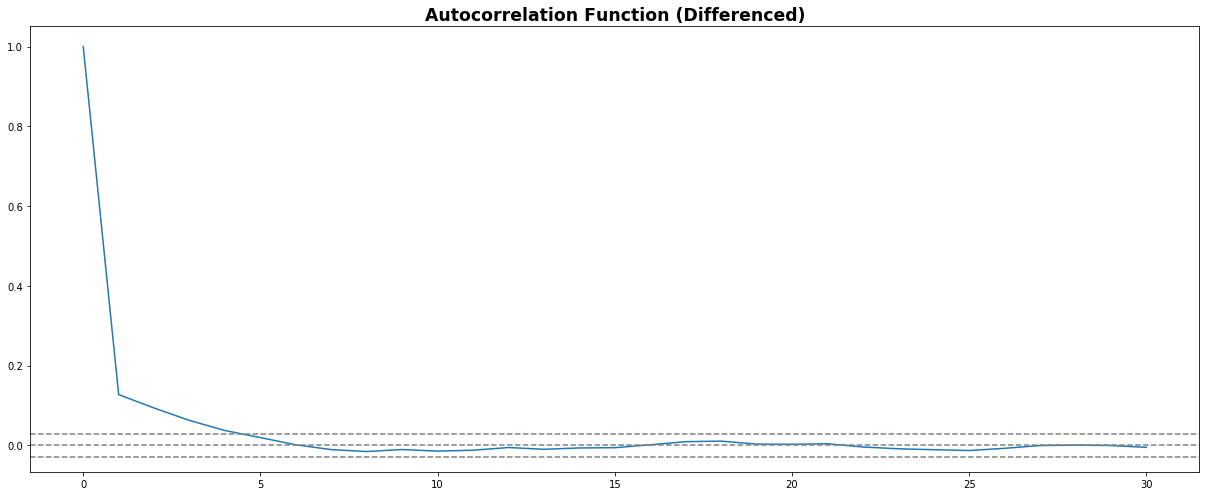

In [19]:
#Plot ACF:
plt.figure(figsize=(33.3,7))
plt.subplot(121) 
plt.plot(lag_acf_Diff)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(X[:,0,0])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(X[:,0,0])),linestyle='--',color='gray')
plt.title('Autocorrelation Function (Differenced)')
plt.tight_layout()

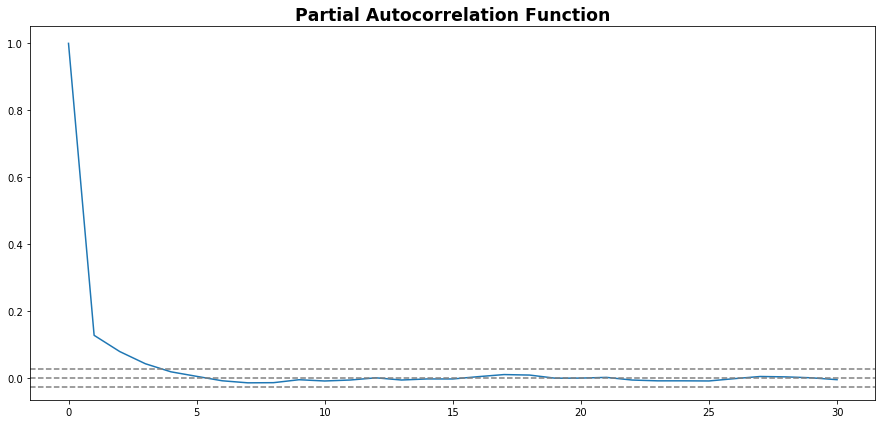

In [20]:
#Plot PACF:
plt.figure(figsize=(24.3,6))
plt.subplot(122)
plt.plot(lag_pacf_Diff)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(X[:,0,0])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(X[:,0,0])),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [21]:
# Define the p, d and q parameters to take any value between 0 and 2
p = (2, 4, 9)
d = range(0, 2)
q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))
# pdq tuple array is generated properly, checked up to here so far

# Generate all different combinations of pdq


print('Examples of parameter combinations for Seasonal ARIMA...')
print('ARIMA: {}'.format(pdq[1]))
print('ARIMA: {}'.format(pdq[1]))
print('ARIMA: {}'.format(pdq[2]))
print('ARIMA: {}'.format(pdq[2]))

Examples of parameter combinations for Seasonal ARIMA...
ARIMA: (2, 0, 1)
ARIMA: (2, 0, 1)
ARIMA: (2, 0, 2)
ARIMA: (2, 0, 2)


In [22]:
"""
min_aic = float('Inf')
opt_param = (-1, -1, -1)
for param in pdq:
    mod = ARIMA(X[:,0,0], order=param)                              
    results = mod.fit()
    # save best one either manually or thru extra
    if results.aic < min_aic:
      min_aic = results.aic
      opt_param = param
    print('ARIMA{} - current AIC:{}'.format(param, results.aic))

    print('this AIC = {}\tmin_aic = {}'.format(results.aic, min_aic))
    print('optimal parameters = {}'.format(opt_param))

"""

"\nmin_aic = float('Inf')\nopt_param = (-1, -1, -1)\nfor param in pdq:\n    mod = ARIMA(X[:,0,0], order=param)                              \n    results = mod.fit()\n    # save best one either manually or thru extra\n    if results.aic < min_aic:\n      min_aic = results.aic\n      opt_param = param\n    print('ARIMA{} - current AIC:{}'.format(param, results.aic))\n\n    print('this AIC = {}\tmin_aic = {}'.format(results.aic, min_aic))\n    print('optimal parameters = {}'.format(opt_param))\n\n"

In [23]:
X.shape
print(X[1,0])

[814. 815. 803. 793. 800. 805. 813. 824. 829. 829. 852. 810. 756. 751.
 830.]


# Fit Models

### RNN

In [24]:
RNN = initRNN()
RNN.compile(loss='mean_squared_error', optimizer = 'adam')
print(RNN.input_shape)
RNN.fit(X, y, epochs = numEpoch,  batch_size=1, 
         verbose=2, validation_split = .1)

(None, 1, 15)
Train on 4406 samples, validate on 490 samples
Epoch 1/5
 - 9s - loss: 695079498.7497 - val_loss: 459774007.1216
Epoch 2/5
 - 9s - loss: 693663418.3781 - val_loss: 458671234.4963
Epoch 3/5
 - 8s - loss: 692250608.1079 - val_loss: 457569598.8276
Epoch 4/5
 - 9s - loss: 690853536.4022 - val_loss: 456479534.2615
Epoch 5/5
 - 9s - loss: 689446591.8285 - val_loss: 455381815.4565


### LSTM

In [25]:
LSTM = initLSTM()
LSTM.compile(loss='mean_squared_error', optimizer = 'adam')
print(LSTM.input_shape)
LSTM.fit(X, y, epochs = numEpoch,  batch_size=1, 
         verbose=2, validation_split = .1)

(None, 1, 15)
Train on 4406 samples, validate on 490 samples
Epoch 1/5
 - 14s - loss: 695575567.0325 - val_loss: 460546038.0216
Epoch 2/5
 - 13s - loss: 695152963.2426 - val_loss: 460218777.0668
Epoch 3/5
 - 13s - loss: 694739885.2159 - val_loss: 459891265.6246
Epoch 4/5
 - 13s - loss: 694324522.9397 - val_loss: 459562696.2276
Epoch 5/5
 - 12s - loss: 693909322.8897 - val_loss: 459235128.8343


### CNN

In [26]:
CNN = initCNN()
CNN.compile(loss='mean_squared_error', optimizer = 'adam')

### Dense

In [27]:
# Need to reshape dimensions for dense, see colab notebook

Dense = initDense()
Dense.compile(loss='mean_squared_error', optimizer = 'adam')
print(Dense.input_shape)
Dense.fit(X, y, epochs = numEpoch,  batch_size=1, 
         verbose=2, validation_split = .1)

(None, 1, 15)


ValueError: Error when checking target: expected dense_9 to have 3 dimensions, but got array with shape (4896, 1)

### ARIMA

Doesn't work since data is not stationary. Will work on stationarity with filtering and 

In [ ]:
'''
# Chosen from previous cell
opt_param = (9, 0, 2)

results = []
for i in range(2): #len(X[:,0,0]))
    model = ARIMA(X[i,0],opt_param)
    results.append(model.fit())
    
print(results)
'''